# Discriminative Classifiers: K-Nearest Neighbours

In this practical, we will first manually implement k-nearest neighbours. We will explore how the algorithm constructs decision boundaries and how it classifies data. We will visualise these boundaries for our own implementation, before using `sklearn` implentations to compare and contrast with our own.

Then, we will move to using `sklearn` for a more traditional data science task, using a real dataset.

# Implementing KNN

Recall that the KNN algorithm relies on the concept of distance between two items in order to quantify how similar they are. Input data is represented as an array of features, which locates each item within a vector space. We will use data with two dimensions, longitude and latitude, which will make it easy to visualise.

We will need four functions:

1. `euclidean_distance(p1, p2)` - given a pair of (x,y) coordinates, calculate how close they are using Euclidean distance: $$ \sqrt{(x_2-x_1)^2+(y_2-y_1)^2} $$
2. `manhattan_distance(p1, p2)` - calculate $$ | x_1 - x_2 | + | y_1 - y_2 | $$
3. `get_neighbours(new_point, known_points, distance_function)` - given a single coordinate, calculate how close it is to all other points using the provided distance function
4. `classify(neighbours_list, k)` - given a list of points with their distances and their class label, determine which class is most common in the `k` nearest neighbours

The classification process will work as follows:

1. For a new point with no class label, get the distance from it to every known point
2. From that list of distances, take the `k` nearest ones
3. From that subset, find out which class is the most common and use it to label the new point

Below are templates for the functions, which you will complete.

## The distance functions

Complete the two functions below using the docstring as a guide.

(Note: to calculate the absolute value for Manhattan distance, use the `abs()` function.)

In [2]:
from math import sqrt  # For calculating square root
    
def euclidean_distance(point1, point2):
    '''
    Inputs:
        point1 : a tuple of (lon, lat) coordinates
        point2 : a tuple of (lon, lat) coordinates
    
    Returns:
        distance : a float, the distance between the points
    '''
    
    distance = ((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)**0.5
    return distance


In [4]:
def manhattan_distance(point1, point2):
    '''
    Inputs:
        point1 : a tuple of (lon, lat) coordinates
        point2 : a tuple of (lon, lat) coordinates
    
    Returns:
        distance : a float, the distance between the points
    '''
    
    distance = abs(point2[0] - point1[0]) + abs(point2[1] - point1[1])
    return distance


## Testing the `distance` functions

Run the cell below to test your functions are working as expected.

In [5]:
assert euclidean_distance((0,0), (0,0)) == 0
assert euclidean_distance((0,0), (-1,0)) == 1
assert euclidean_distance((0,0), (2,0)) == 2
assert euclidean_distance((0,0), (1,1)) == 1.4142135623730951
assert euclidean_distance((1233,376.4), (-213.2,0.03)) == 1494.372382272906

assert manhattan_distance((0,0), (0,0)) == 0
assert manhattan_distance((0,0), (-1,0)) == 1
assert manhattan_distance((0,0), (2,0)) == 2
assert manhattan_distance((0,0), (1,1)) == 2
assert manhattan_distance((1233,376.4), (-213.2,0.03)) == 1822.5700000000002

print('All good!')

All good!


## The `get_neighbours` function

This should loop through a list of labeled points and calculate the distance between each one and a new unlabeled point, using your `distance` function.

(Note: the returned list should be sorted, such that the first item is the nearest and so on. Use `sorted()` on a list. To sort them by the third item in each sub-item, use `sorted(your_list, key=itemgetter(2))` - remember that Python starts counting at 0, not 1.)

In [29]:
from operator import itemgetter  # For sorting lists by particular items inside sub-items

def get_neighbours(new_point, known_points, distance_function):
    '''
    Inputs:
        new_point : a tuple of (lon, lat) coordinates
        known_points : a list of tuples of (lon, lat, label)
        distance_function : a function to calculate distance
    Returns:
        neighbours : a sorted list of tuples with ((lon, lat), label, distance)
    '''
    neighbours = []

    for lon, lat, label in known_points:
        d = distance_function(new_point, (lon, lat))
        neighbours.append(((lon, lat), label, d))
    
    neighbours = sorted(neighbours, key = itemgetter(2))
    return neighbours


## Testing the `distance` function

Run the cell below to test your function is working as expected.

In [30]:
known = [(0,0,'A'), (1,1,'A'), (3,4,'B'), (5,4,'B'), (1.5, 1.5,'C')]
new = (2,2)

assert get_neighbours(new, known, euclidean_distance) == [((1.5, 1.5), 'C', 0.7071067811865476), ((1, 1), 'A', 1.4142135623730951), ((3, 4), 'B', 2.23606797749979), ((0, 0), 'A', 2.8284271247461903), ((5, 4), 'B', 3.605551275463989)]

assert get_neighbours(new, known, manhattan_distance) == [((1.5, 1.5), 'C', 1.0), ((1, 1), 'A', 2), ((3, 4), 'B', 3), ((0, 0), 'A', 4), ((5, 4), 'B', 5)]

print('All good!')

All good!


## The `classify` function

This function should take the output of `get_neighbours` and calculate which class is the most common in the nearest `k` items.

`collections.Counter` can turn a list of items into a dictionary of item:count.

`Counter(['A', 'B', 'B'])` gives you `{'A':1, 'B':2}`

To get the top item, use the `.most_common()` method, which returns a sorted list of item/count pairs. The first item is the most common item.

In [31]:
# Demonstration of Counter
from collections import Counter

some_list = list('AUHSUGQWURBUQWVYFVQFQFQIHIUQBF')

counts = Counter(some_list)

print(f"The counter: {counts}\n")

top_item = counts.most_common()

print(f'Items sorted by their counts: {top_item}\n')
print(f'Most common item and its count: {top_item[0]}\n')
print(f"Most common item's name: {top_item[0][0]}\n")
print(f"Most common item's count: {top_item[0][1]}")

The counter: Counter({'Q': 6, 'U': 5, 'F': 4, 'H': 2, 'W': 2, 'B': 2, 'V': 2, 'I': 2, 'A': 1, 'S': 1, 'G': 1, 'R': 1, 'Y': 1})

Items sorted by their counts: [('Q', 6), ('U', 5), ('F', 4), ('H', 2), ('W', 2), ('B', 2), ('V', 2), ('I', 2), ('A', 1), ('S', 1), ('G', 1), ('R', 1), ('Y', 1)]

Most common item and its count: ('Q', 6)

Most common item's name: Q

Most common item's count: 6


In [66]:
# Complete the function below.
# The first part checks to make sure k is a valid value,
# based on the data the function is passed.

def classify(neighbours_list, k):
    '''
    Inputs:
        neighbours_list : a list of ((lon, lat), label, distance)
        k : the number of neighbours to use for classification
    Returns:
        label : the most commonly observed label of the top k items in neighbours
    '''
    
    if k <= 0:
        raise ValueError('k too low: must be > 0')
    if k > len(neighbours_list):
        raise ValueError('k too high: must be <= the number of neighbours')
    
    a1 = [i[1] for i in neighbours_list]
    a2 = a1[:k]
    a3 = Counter(a2)
    a4 = a3.most_common()
    a5 = a4[0][0]
    return a5


## Testing

In [68]:
known = [(0,0,'A'), (1,1,'A'), (3,4,'B'), (5,4,'B'), (1.5, 1.5,'C')]
new = (0.5,0.5)

neighbours_euc = get_neighbours(new, known, euclidean_distance)

assert classify(neighbours_euc, 3) == 'A'

neighbours_man = get_neighbours(new, known, manhattan_distance)

assert classify(neighbours_man, 3) == 'A'

print('All good!')

All good!


## Putting it all together

Putting this all together, we can now do KNN classification with the following workflow.

(It's not as elegant as `sklearn` but it works!)

In [69]:
train_data = [(1,1,'A'), (1,1.5,'A'), (2,2,'A'), (4,5,'B'), (8,4,'B')]

new_data = [(0.5, 0.5), (9.3,9.0), (5.1,5.6)]

for point in new_data:
    neighbours = get_neighbours(point, train_data, euclidean_distance)
    label = classify(neighbours, k=3)
    
    print(f"Item: {point} Prediction: {label}")

Item: (0.5, 0.5) Prediction: A
Item: (9.3, 9.0) Prediction: B
Item: (5.1, 5.6) Prediction: B


## KNN: assigning towns to regions

Imagine you are a government official, in charge of assigning new towns to a region.

This job was easy until someone lost all the boundary maps. Now, nobody knows what the geographical properties of each region actually are.

Fortunately, you **do** know which region all the existing towns are in, as well as the coordinates of all those towns.

You decide that the best approach is assign new towns to a region based on which other towns it is nearest to.

In [70]:
import pandas as pd

data = pd.read_csv('data/uk-towns-sample.csv')

train_data = data[data['kind'] == 'Train']
test_data = data[data['kind'] == 'Test']

train_data.head()

,name,region,lon,lat,kind
0,Aaron's Hill,Surrey,-0.63098,51.18291,Train
1,Abbas Combe,Somerset,-2.41825,51.00283,Train
2,Abberley,Worcestershire,-2.37574,52.30522,Train
3,Abberton,Essex,0.91066,51.83440,Train
4,Abberton,Worcestershire,-2.00817,52.17955,Train


In [71]:
# Get the data into the expected format for our functions

train_data = list(zip(train_data.lon.tolist(), train_data.lat.tolist(), train_data.region.tolist()))
test_data = list(zip(test_data.lon.tolist(), test_data.lat.tolist(), test_data.region.tolist()))

With your KNN functions, write a loop that goes through the first 3 items of `test_data` and predicts a region for them.

Get predictions for Euclidean distance, at `k=3` and `k=300`.

What do you observe? What happens when `k` is large? Why do you think that is?

In [ ]:
for lon, lat, region in test_

In [81]:
test_data[1]

(-2.89607, 51.96946, 'Herefordshire')

In [85]:
for i in range(3):
    neighbours = get_neighbours(test_data[i], train_data, euclidean_distance)
    label_3 = classify(neighbours, k=3)
    label_300 = classify(neighbours, k=300)
    print(f"Item: {i}, Region is {test_data[i][2]},  Predictions: 3: {label_3} & 300: {label_300}")

Item: 0, Region is South Yorkshire,  Predictions: 3: South Yorkshire & 300: Staffordshire
Item: 1, Region is Herefordshire,  Predictions: 3: Herefordshire & 300: Shropshire
Item: 2, Region is Dorset,  Predictions: 3: Dorset & 300: Somerset


## Evaluating the predictions

The cell below will use the test data to evaluate performance at different `k` values. As you can see, setting `k` too high or too low hurts performance on unseen data.

Note that our implementation takes around 1 second to run all these predictions.

In [86]:
%%time

from sklearn.metrics import f1_score

for k in [1,3,5,10,20,100,300]:
    predictions = []
    expected = []

    for lon, lat, region in test_data:

        point = (lon, lat)

        neighbours = get_neighbours(point, train_data, euclidean_distance)
        label = classify(neighbours, k=k)

        predictions.append(label)
        expected.append(region)

    print(f'F1 score for k={k}\t: {f1_score(expected, predictions, zero_division=0, average="weighted"):.3f}')


F1 score for k=1	: 0.898
F1 score for k=3	: 0.912
F1 score for k=5	: 0.891
F1 score for k=10	: 0.846
F1 score for k=20	: 0.772
F1 score for k=100	: 0.382
F1 score for k=300	: 0.095
CPU times: total: 1.27 s
Wall time: 3.19 s


## Recreating the map

How could you use the data and the model to create a new map, showing the regional boundaries? How would it compare to the "true" map?

In [87]:
# Your thoughts below...
# scatter plot of all potential data point to build the boundries
# I'd expect it to be mostly similar except for near the borders -- low res good, high res messy

Running the cell below will do the following

1. Determine the min/max lon/lat points
2. Use these to create a grid of (x,y) points
3. Classify all these points using the KNN model
4. Colour each point according to prediction
5. Plot predictions and towns

(It will take maybe a minute or two, because the KNN prediction process is not optimised! But there is a little progress bar, to show you that things are happening.)

  0%|          | 0/9765 [00:00<?, ?it/s]

  0%|          | 0/9765 [00:00<?, ?it/s]

  0%|          | 0/9765 [00:00<?, ?it/s]

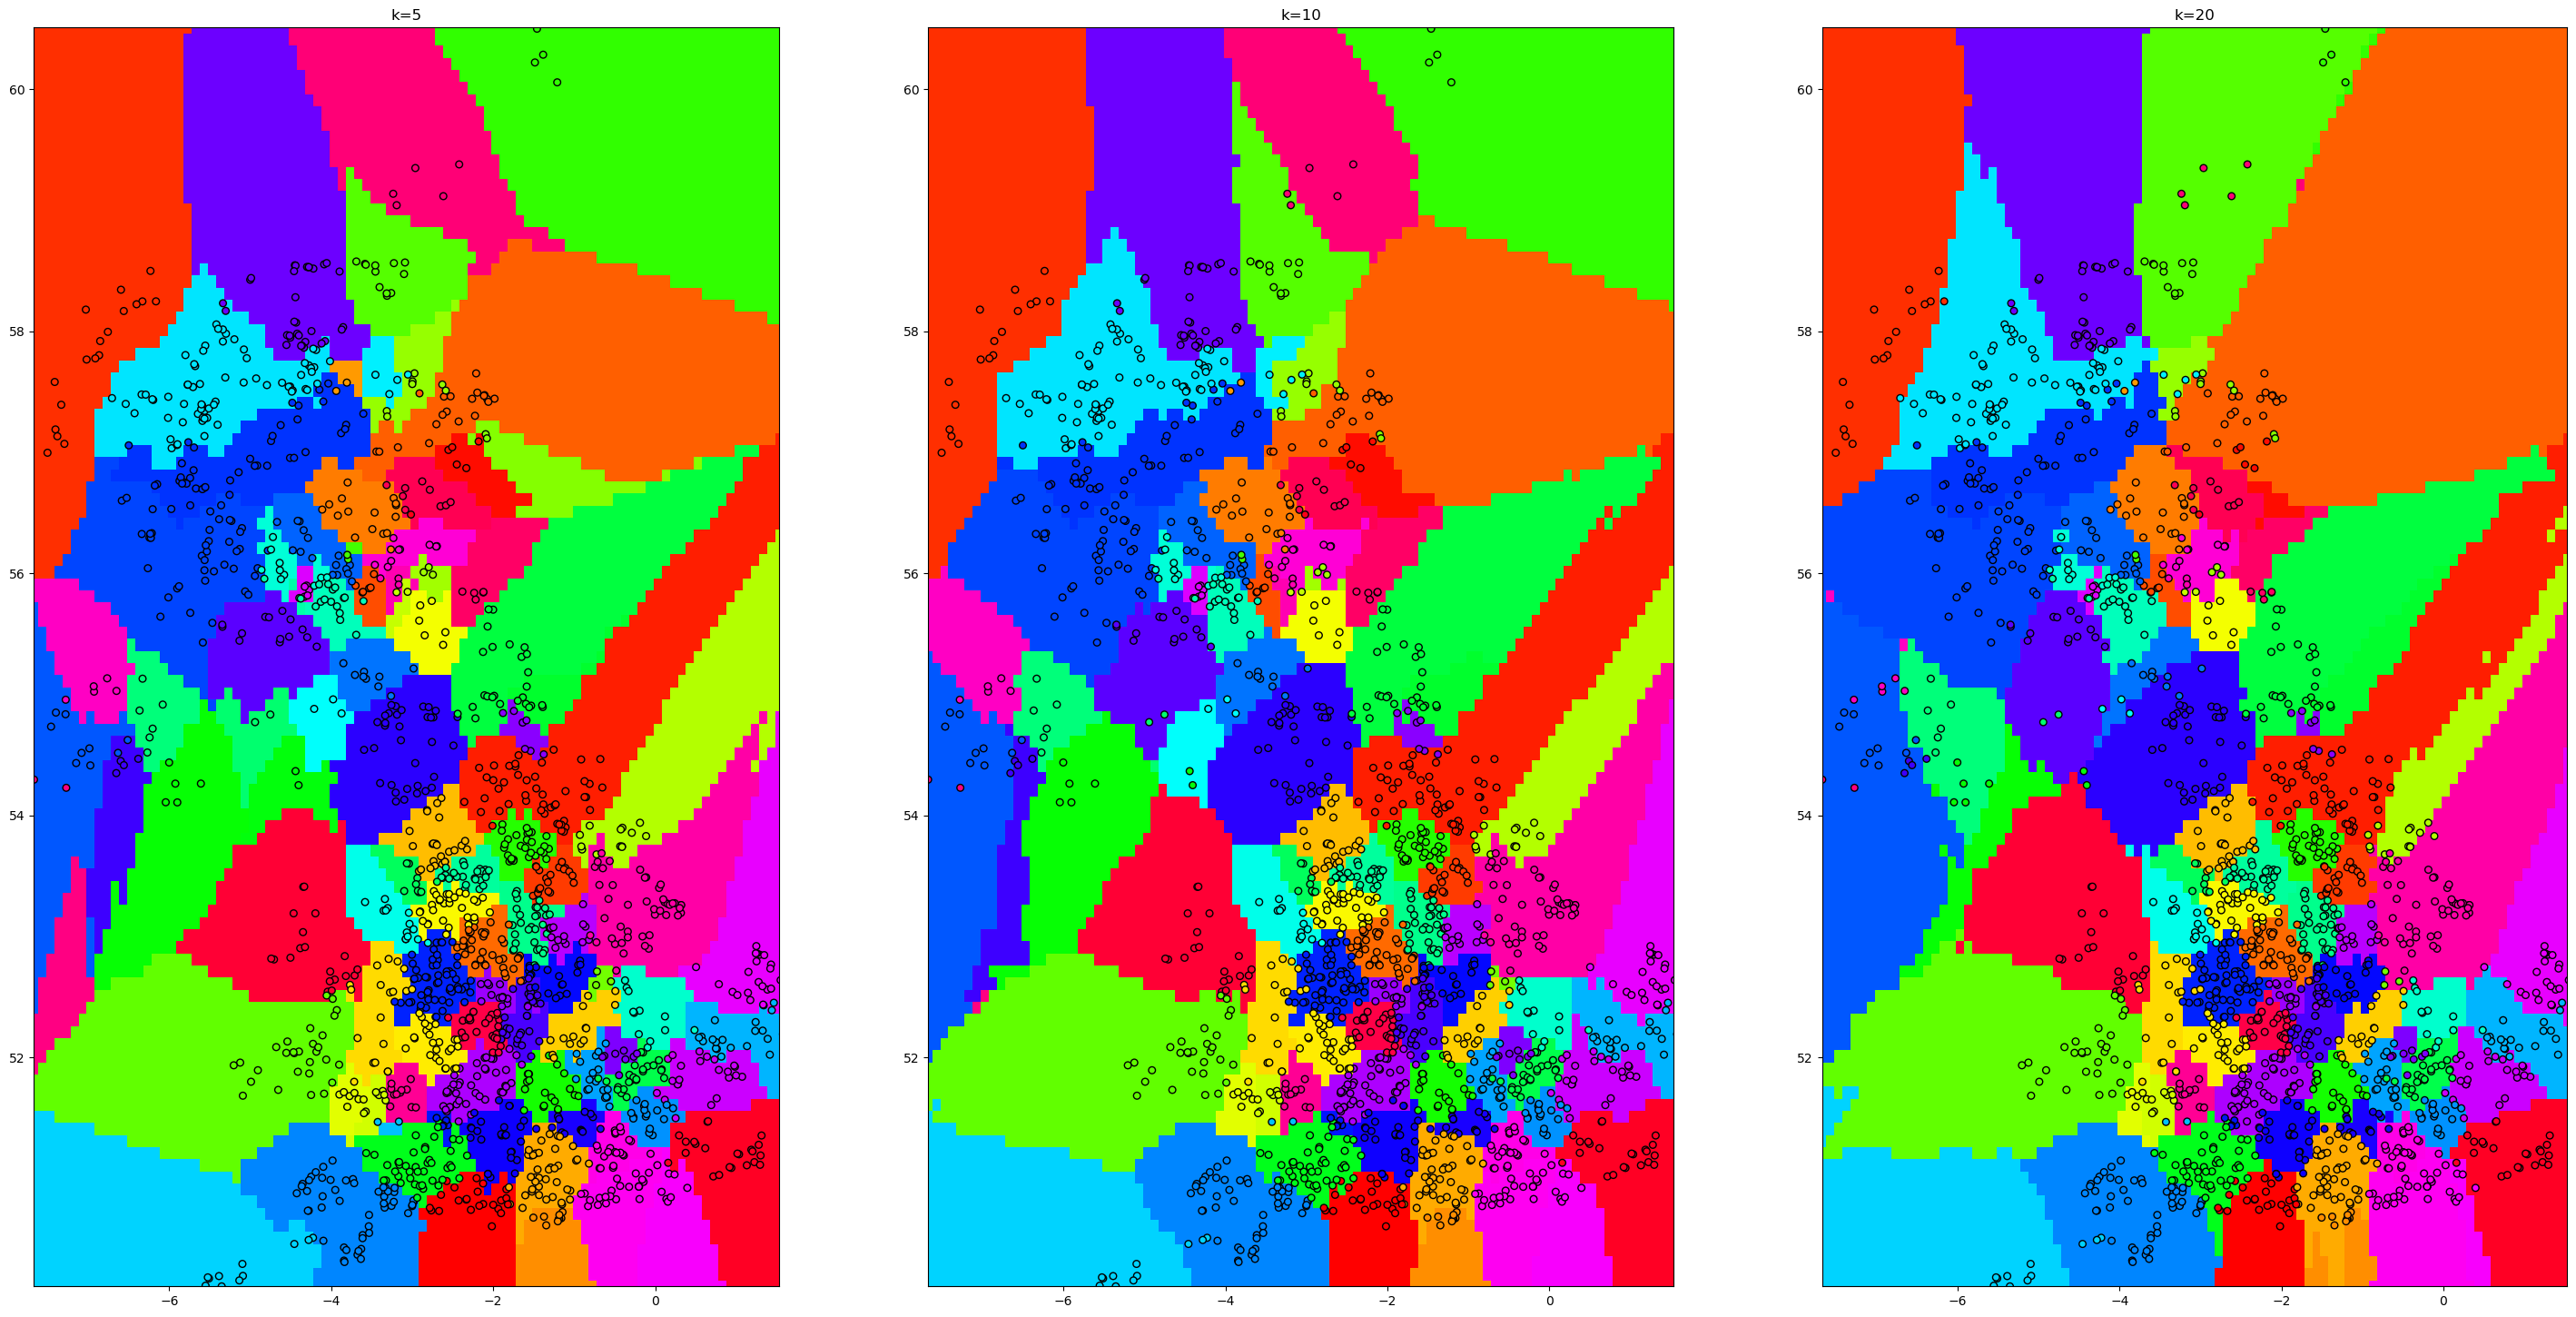

In [88]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from tqdm.notebook import tqdm

colour_vals = np.linspace(0,1,96)
np.random.seed(5)
np.random.shuffle(colour_vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.hsv(colour_vals))


def plot(k):
    # Make coords for predicting
    min_lon, max_lon = min(train_data, key=itemgetter(0))[0], max(train_data, key=itemgetter(0))[0]
    min_lat, max_lat = min(train_data, key=itemgetter(1))[1], max(train_data, key=itemgetter(1))[1]

    xx, yy = np.meshgrid(np.arange(min_lon, max_lon, 0.1),
                         np.arange(min_lat, max_lat, 0.1))

    # Do the predictions
    grid_predictions = []
    for point in tqdm(zip(xx.flatten(), yy.flatten()), total=len(xx.flatten())):
        neighbours = get_neighbours(point, train_data, euclidean_distance)
        label = classify(neighbours, k=k)
        grid_predictions.append(label)
    grid_predictions = np.array(grid_predictions).reshape(xx.shape)

    # Need to be able to convert between text and numerical labels, to plot properly
    p_to_i = {p:i for i, p in enumerate(set([i[2] for i in train_data]))}
    i_to_p = {i:p for i, p in enumerate(set([i[2] for i in train_data]))}

    
    # Plot each grid prediction
    plt.pcolormesh(xx, yy, np.array([p_to_i[p] for p in grid_predictions.flatten()]).reshape(xx.shape), cmap=cmap, shading='auto')

    # Plot the towns, coloured by region
    x_vals = [i[0] for i in train_data]
    y_vals = [i[1] for i in train_data]
    colors = [p_to_i[i[2]] for i in train_data]
    plt.scatter(x_vals, y_vals, c=colors, cmap=cmap, edgecolor='k', s=30)
    plt.xlim(xx.min(), xx.max());
    plt.ylim(yy.min(), yy.max());
    plt.title(f"k={k}")
    
    # Output a classification report

f,a = plt.subplots(1,3, figsize=(36,18));

for i, k in enumerate([5,10,20]):
    plt.sca(a[i])
    plot(k)   

## Interpreting the boundaries

In the three plots, we used a `k` of 3, 10 and 20. What do you observe in terms of the decision boundaries?

What problems do you anticipate in terms of using this as a map of the country's regional boundaries?

In [ ]:
# Your thoughts below...
# guesswork for outliers -- drawing some terrible lines
# broadly similar
# it gets worse as k increases
# map data, so no distinction between land and sea


# KNN: sklearn

Now let's compare our implementation to that in `sklearn`. Run the cell below. You'll see it only takes 100ms, compared to 1s for ours!

In [89]:
%%time

from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('data/uk-towns-sample.csv')

train_data = data[data.kind == 'Train']
test_data = data[data.kind == 'Test']

for our_score, k in zip([0.898,0.912,0.891,0.846,0.772,0.382,0.095], [1,3,5,10,20,100,300]):

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(train_data[['lon', 'lat']], train_data['region'])
    sklearn_score = knn.score(test_data[['lon', 'lat']], test_data['region'])
    
    print(f"k={k}")
    print(f"sklearn F1 score: {sklearn_score:.3f}")
    print(f"Our F1 score: {our_score}")
    if our_score - sklearn_score > 0:
        print(f'Ours was better by {our_score - sklearn_score:.3f}\n\n')
    else:
        print(f'Sklearn was better by {our_score - sklearn_score:.3f}\n\n')

k=1
sklearn F1 score: 0.896
Our F1 score: 0.898
Ours was better by 0.002


k=3
sklearn F1 score: 0.909
Our F1 score: 0.912
Ours was better by 0.003


k=5
sklearn F1 score: 0.878
Our F1 score: 0.891
Ours was better by 0.013


k=10
sklearn F1 score: 0.848
Our F1 score: 0.846
Sklearn was better by -0.002


k=20
sklearn F1 score: 0.768
Our F1 score: 0.772
Ours was better by 0.004


k=100
sklearn F1 score: 0.445
Our F1 score: 0.382
Sklearn was better by -0.063


k=300
sklearn F1 score: 0.177
Our F1 score: 0.095
Sklearn was better by -0.082


CPU times: total: 62.5 ms
Wall time: 321 ms


# The Wisconsin Breast Cancer Data Set

You should now feel very familiar with the KNN model - how it learns from data to construct decision boundaries, the impact of $k$, and how predictions are made.

In this next part of the practical, we will work with a real dataset of medical data. The features are generated from images of masses taken from breast tissue. The outcome variable is whether the mass is malignant or benign. More information can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

We will use a train/test split to explore the impact of the $k$ on performance, looking at the trade-off between bias and variance. We will also look at how the KNN model is sensitive to the values of the features you use.

First, load the data into a DataFrame and assign the features to `X` and the `diagnosis` variable to `y`.

Look at the distribution of benign (`y==0`) and malignant (`y==1`). What do you notice?

In [90]:
import pandas as pd

data = pd.read_csv('data/wisconsin_data.csv')


X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

print(y.value_counts(normalize=True))


# Your thoughts here...
# high +ve flag for malignant masses, but skews to benign


diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


## Creating a test/train split

In the slides, we briefly mentioned that one way to set the hyper-parameter `k` is to:
   1. Split our data into training and test data
   2. Train multiple models with different values of `k` and evaluate their performance on the test data
   3. Select the model that minimises the train and test error

This will be covered in more detail later. For now, however, we can just use the [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split our data into these training and testing samples for us.

We should note that the dataset contains roughly twice as many examples of benign compared to malignant outcomes. This means we need to be careful when creating the test/train split: the ratios within each split should be similar to that of the whole dataset. Otherwise, any evaluation we do might not report accurate results.

You could do this manually but the `sklearn.model_selection.train_test_split` function can handle it all. It takes in data `X` and `y` and splits it into `X_train`, `X_test`, `y_train` and `y_test`.

Use this function to split up your data. Make the test set contain around 20% of the data using `test_size=0.2`.

Set `stratify=y` to ensure the ratio of classes in `y_train`/`y_test` is preserved and check this is the case.

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2, stratify=y)

print(y_train.value_counts(normalize=True))

print(y_test.value_counts(normalize=True))


diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64
diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64


## Training an initial model

Instantiate a `sklearn.neighbors.KNeighborsClassifier` model with default parameters (`k=5`), named `knn`.

Use the `.fit()` method to train it on `X_train` and `y_train`.

Use the `.score()` method of the trained model to find its accuracy using the test set `X_test` and `y_test`

In [99]:
y_train.head()

440    0
266    0
381    0
35     1
256    1
Name: diagnosis, dtype: int64

In [116]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.values, y_train.values)
knn.score(X_test.values, y_test.values)
print(f"Accuracy: {knn.score(X_test.values, y_test.values):.3f}")

Accuracy: 0.921


## Pre-processing data for optimal KNN performance

Because KNN uses the concept of **distance** between points to determine similarity, if the scales of features differ wildly then it can cause issues.

For example, if one feature is in the range 1-5, but another in the 400 to 290000, then the Euclidean spaces represented by these features are very far apart. Distances between two points based on these features will be extreme.

The min/max of `X_train` shows this:

In [105]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.091193,19.291011,91.771363,653.787473,0.097063,0.105788,0.090185,0.049932,0.182187,0.063142,...,16.224244,25.584220,106.989187,878.274945,0.133103,0.255724,0.273354,0.115423,0.290921,0.084208
std,3.629729,4.226759,25.018500,363.718118,0.014200,0.052528,0.079453,0.039669,0.028124,0.007180,...,4.916638,6.082048,34.234078,581.009362,0.022710,0.157416,0.207503,0.066410,0.063641,0.017679
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.026500,0.000000,0.000000,0.116700,0.050240,...,7.930000,12.020000,50.410000,185.200000,0.084090,0.043270,0.000000,0.000000,0.156500,0.055040
25%,11.650000,16.330000,74.700000,415.650000,0.086760,0.066015,0.029520,0.020450,0.161900,0.057985,...,12.995000,21.080000,84.135000,513.500000,0.117350,0.146450,0.115450,0.063930,0.247400,0.071865
50%,13.170000,18.840000,85.630000,537.300000,0.096670,0.096970,0.063350,0.033340,0.180100,0.061840,...,14.800000,25.400000,96.660000,674.700000,0.131600,0.215800,0.226700,0.098610,0.282700,0.080200
75%,15.935000,21.895000,104.400000,793.150000,0.106450,0.131750,0.135950,0.077465,0.197350,0.066640,...,19.025000,29.880000,126.500000,1098.500000,0.146450,0.341600,0.387200,0.166100,0.319450,0.092195
max,28.110000,33.560000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.290300,0.663800,0.173000


It is not the raw feature values that matter, but their size relative to each other. Therefore, we can scale all features to be within the same range. This is normally 0 to 1.

This can be easily done using `sklearn.preprocessing.MinMaxScaler`:



In [106]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"New min: {X_train_scaled.min():.3f} New max: {X_train_scaled.max():.3f}")

New min: 0.000 New max: 1.000


Train and score a new KNN as before, named `knn_scaled`, using the new scaled data.

In [115]:
# Your code here...
from sklearn.neighbors import KNeighborsClassifier

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
knn_scaled.score(X_test_scaled, y_test)
print(f"Accuracy: {knn_scaled.score(X_test_scaled, y_test):.3f}")


Accuracy: 0.947


Accuracy has improved quite a bit!

## The impact of `k` on accuracy

Recall that the value of $k$ in KNN impacts model **bias** (how well the model captures relevant relations in the features) and model **variance** (how sensitive the model is to noise in the features).

A KNN model is most prone to overfitting when $k$ is low, and underfitting when $k$ is high.

For values of $k$ in `range(1, 400)`, create a model using that value of $k$ and `.fit()` it using `X_train_scaled` and `y_train`.

Use the `.score()` method on the train data (`X_train_scaled` and `y_train`) and store the resulting score in `accs_train`.

Use the `.score()` method on the test data (`X_test_scaled` and `y_test`) and store the resulting score in `accs_test`.

(This might take 30 seconds or so to complete!)

In [122]:
accs_train = []
accs_test = []

#Your code here...
for k in range(1,400):
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    train_score = knn_scaled.score(X_train_scaled, y_train)
    accs_train.append(train_score)
    test_score = knn_scaled.score(X_test_scaled, y_test)
    accs_test.append(test_score)


The cell below will plot the results for you, of accuracy at various values of $k$. What do you observe?

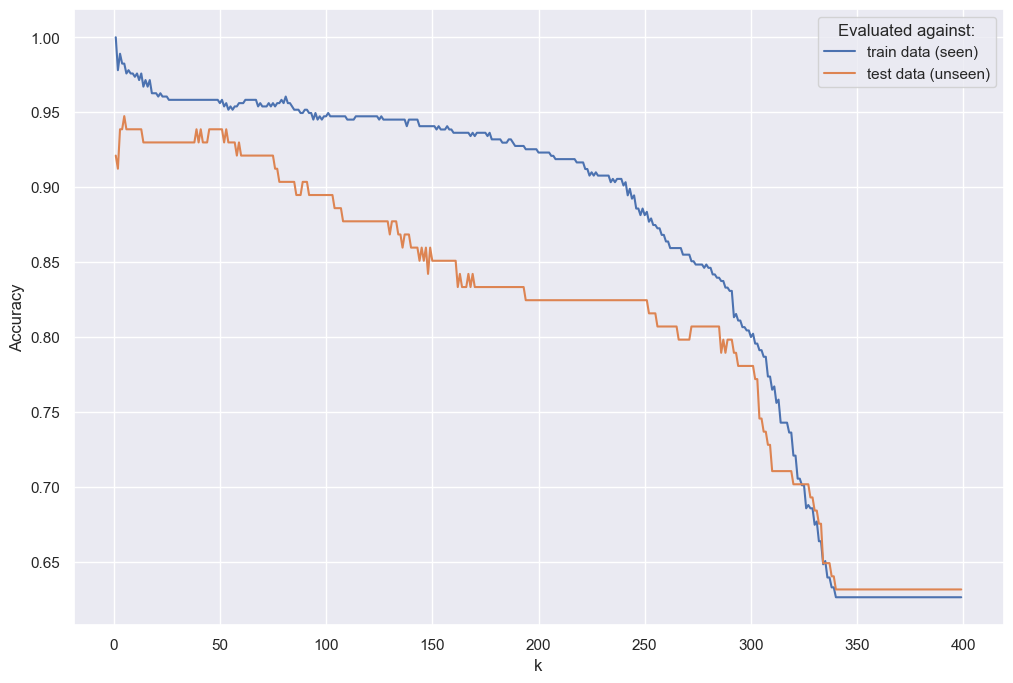

In [123]:
import seaborn as sns

# Make plot a readable size
sns.set(rc={'figure.figsize':(12, 8)})
# Convert data to DataFrame
df = pd.DataFrame(zip(accs_train, accs_test, range(1,400)), columns=['train data (seen)', 'test data (unseen)', 'k'])
# Melt to long format for easy plotting
df = df.melt(var_name='Evaluated against:', id_vars='k', value_name='Accuracy')
# Plot dataframe
g = sns.lineplot(data=df, hue='Evaluated against:', x='k', y='Accuracy')


# Your thoughts here...
print('Accuracy is generally quite high until around k=150.')
print('At lower k, train data accuracy is generally higher than test data accuracy - overfitting.')
print('At higher k up to around 250, test data accuracy is higher than train data. Beyond this is underfitting.')
print('Performance plateaus at around 0.63 - this is the percentage of the most-common label in the dataset!')



## Evaluating KNN: true/false positives/negatives

The `.score()` method used the accuracy metric - the number of correct classifications out of the total classifications made.

This doesn't really give the best picture of model performance, though. As you saw when $k>350$, accuracy flatlines at 0.63. This is because the model is using almost ALL the other data points for classification and around 63% of them are in the benign class.

A more useful approach is to see how the model performed for each individual class. Especially for health-related tasks, we are interested in:

* True Positives (TP): Cases in which the tissue is malignant and it was predicted as such.
* True Negatives (TN): Cases in which the tissue is benign (not malignant) and it was predicted as such.
* False Positives (FP): Cases in which the tissue is benign (not malignant) and it was predicted as malignant. (This is often called Type I error.)
* False Negatives (FN): Cases in which the tissue is malignant and it was predicted as benign. (This is often called Type II error.)

A confusion matrix can show this and can be computed using `pandas.crosstab` then visualised with `seaborn.heatmap`.

The cell below will do this for you. What do you observe?

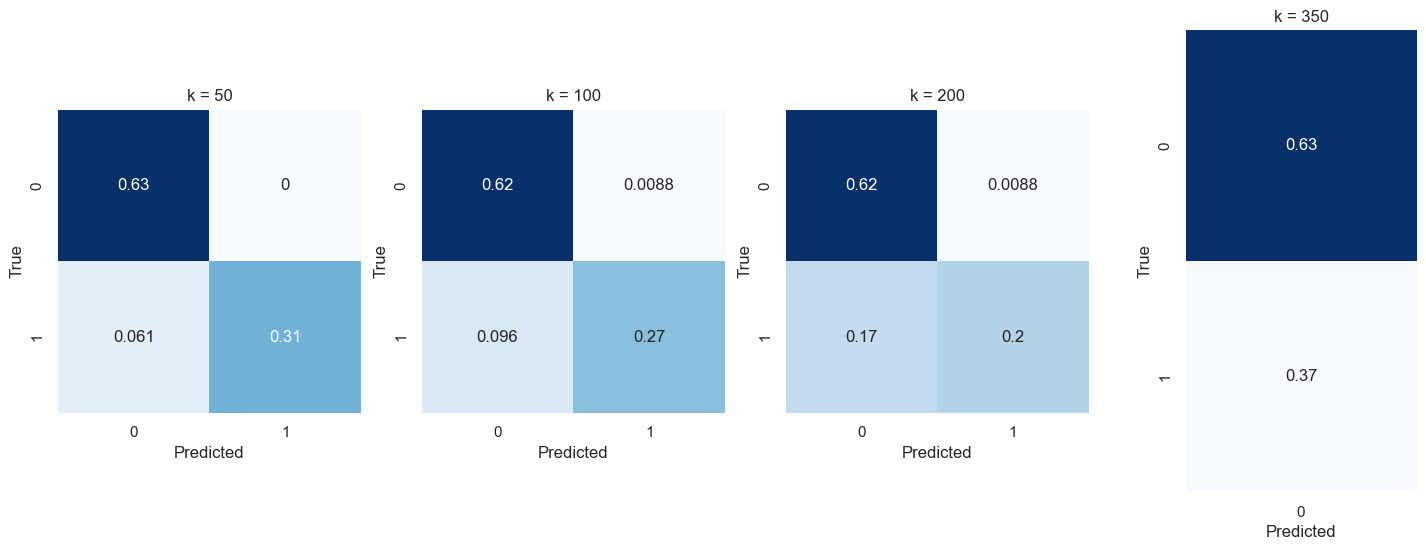

In [124]:
import matplotlib.pyplot as plt

# Make readable size
sns.set(rc={'figure.figsize':(18, 6)})
# Get 4 new blank plots in a row 
fig, axes = plt.subplots(1,4)

# Iterate through a few values of k
for e, k in enumerate([50,100,200,350]):
    # Make model
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train on training data
    knn.fit(X_train_scaled, y_train)
    # Get predictions of test data
    y_pred = knn.predict(X_test_scaled)

    # Make the confusion matrix. Normalise the cells to show percentages overall
    cm = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], normalize=True)
    
    # Plot confusion matrix, one on each of the blank axes. 
    g = sns.heatmap(data=cm, cmap='Blues', square=True, annot=True, ax=axes[e], cbar=False)
    
    # Label them so it's clear which is which
    g.set_title(f"k = {k}")

    
# Your thoughts here...
    print('The top left/bottom right diagonal shows the True Negatives and True Positives.')
print('The top right/bottom left diagonal shows the False Negatives and False Positives.')
print('TN increases with k, until the model is always predicting 0.')
print('TP decreases with k, as the model overfits to the most common class, which is 0.')


## Evaluating KNN: precision, recall, F1 score

True/false positives/negatives can be combined to make new metrics, to give a more concise understanding of how the model is performing.

* Precision = TP/TP+FP
    * Ratio of correctly predicted positive observations to the total predicted positive observations
* Recall = TP/TP+FN
    * Ratio of correctly predicted positive observations to all of the observations in that class
* F1 Score = 2*(Recall Precision) / (Recall + Precision)
    * Weighted average of Precision and Recall
    
`sklearn.metrics.classification_report` can provide a nice summary of all of these metrics, per class.

For values of `k` in `[50,100,200,350]`, train and fit a new model on the scaled training data.

Use the model's `.predict()` method with the scaled test data. Store as `y_pred`.

Use `classification_report(y_test, y_pred, zero_division=0)` to calculate metrics for the model and print them out.

(Note: `zero_division=0` will prevent an error from popping up when precision or recall equal 0.)

What do you observe?

In [125]:
from sklearn.metrics import classification_report


#Your code and thoughts below...
for k in [50,100,200,350]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    print(f"k = {k}")
    
    print(classification_report(y_test, y_pred, zero_division=0))
    
print('The results follow the trend of lower accuracy as k increases.')
print('They give a more detailed picture per class, however.')
print('You can see how performance for the most common class (benign/0) is always very high.')
print('This highlights the importance of using the right metrics for the task!')
    

k = 50
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        72
           1       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

k = 100
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        72
           1       0.97      0.74      0.84        42

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114

k = 200
              precision    recall  f1-score   support

           0       0.79      0.99      0.88        72
           1       0.96      0.55      0.70        42

    accuracy                           0.82       114
   macro avg       0.87      0.77      0.79       114
weighted avg       0.85      0.82      0.81       1

# Conclusion

In this practical, you implemented and explored supervised algorithms for discriminative classification. You implemented k-nearest neighbours yourself, but also used `sklearn`'s (much faster) version of it.

If you want to extend the work here, you could explore how the different distance measures impacts KNN performance - can you generate a better boundary map?

You could also look more into the evaluation metrics for these classifiers. See [the sklearn documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for a range of classification metrics.